In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [2]:
df = pd.read_csv('data/step3_output.csv',sep='\t')

# Create dummy features for categorical variables

In [3]:
dfo=df[['Sex','Housing','Saving accounts','Checking account','Purpose']] # select object type columns
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [4]:
df.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,good,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,bad,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,good,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,good,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,bad,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df['Risk']

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [8]:
df['Risk'].replace({'good':1,'bad':0},inplace=True)

In [9]:
df.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
from sklearn import preprocessing

# Declare an explanatory variable, called X 
X = df.drop(['Risk'],axis=1) 

# Declare a response variable, called y, and assign it the Risk column of the df 
y = df['Risk']

# Here we use the StandardScaler() method of the preprocessing package 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)

In [66]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()


# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(penalty = 'l2',random_state = 40)
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.755


/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Tuning the model

In [68]:
# Use grid search and cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
Cs = [0.001, .01, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
clf_cv = GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train, y_train)
clf_cv.best_params_

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

{'C': 0.01}

In [73]:
clf_cv.best_score_

0.74

In [74]:
#print accuracy score on test data
print(accuracy_score(clf_cv.predict(X_test), y_test))

0.715


In [75]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(clf_cv,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(clf_cv,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

[0.73275862 0.72619048 0.83928571 0.7827381  0.71103896]
Mean cross validation test score: 0.7584023734885804
Mean cross validation train score: 0.7563558889611185
Standard deviation in cv test scores: 0.04705920397882621


/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

In [76]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,clf_cv.predict(X_test))
print(cnf_matrix)
Accuracy_lr=clf_cv.score(X_test,y_test)

print(Accuracy_lr)

[[ 25  34]
 [ 23 118]]
0.715


# Model 2: Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)

#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [78]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.74625
{'max_depth': 7, 'max_features': 7, 'n_estimators': 150}


In [79]:


#Apply RF to the training data:

rf = RandomForestClassifier(max_depth=7, max_features=7, n_estimators=150, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[ 18  41]
 [ 10 131]]
0.745


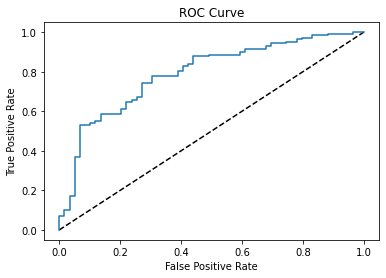

In [80]:
from sklearn.metrics import roc_curve
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Model 3: K-nearest neighour

In [85]:
# Hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Seting the Hyper Parameters
param_grid = {"n_neighbors": [5,15,35,55,75,150],
              "p":[1,2],
              "weights": ['uniform', 'distance']}

#Creating the classifier
model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.735
{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}


In [86]:

knn = KNeighborsClassifier(p=1,weights='distance',n_neighbors=35)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)

[[ 18  41]
 [  8 133]]
0.755


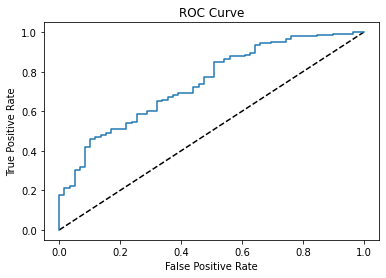

In [87]:
#Predicting proba
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()